<a href="https://colab.research.google.com/github/loganfoote/sagi/blob/main/Statistical_Analysis_and_Inference_(Supplement).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl

# Define matplotlib style
mpl.style.use('classic')
mpl.rc('xtick', labelsize=23); mpl.rc('ytick', labelsize=23)
mpl.rc('xtick.major', size=15 , width=2)
mpl.rc('xtick.minor', size=8, width=2, visible=True)
mpl.rc('ytick.major', size=15 , width=2)
mpl.rc('ytick.minor', size=8, width=2, visible=True)
mpl.rc('lines',linewidth=3, markersize=20)
mpl.rc('axes', linewidth=2, labelsize=30, labelpad=2.5)
mpl.rc('legend', fontsize=25, loc='best', frameon=False, numpoints=1)

mpl.rc('font', family='STIXGeneral')
mpl.rc('mathtext', fontset='stix')

# I. Distribution

## I.1. Basis of Probability

In [ ]:
import numpy as np

# Setting the random seed for reproducibility
np.random.seed(42)

X = np.random.normal(loc=5,scale=3,size=1000)

mean = np.mean(X)
print('mean:',np.round(mean,3),'\n')

var = np.var(X)
print('variant:',np.round(var,3),'\n')

std = np.std(X)
print('standard deviation (std):',np.round(std,3),'\n')

median = np.median(X)
print('median',np.round(median,3),'\n')

mad = np.median(np.abs(X-median))
print('median absolute deviation (mad):',np.round(mad,3))
print('std from mad:',np.round(mad/0.67449,3))

mean: 5.058 

variant: 8.621 

standard deviation (std): 2.936 

median 5.076 

median absolute deviation (mad): 1.939
std from mad: 2.874


## I.2. Common Distributions

In [ ]:
# Setting up visualization tool
def plot_pdf_and_cdf(x,pdf,cdf,name,discrete=False):
    pdf_label = 'PMF' if discrete else 'PDF'
    cdf_label = 'CMF' if discrete else 'CDF'

    # Initialize plot
    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_axes([0.12,0.12,0.83,0.83])

    # Plot pdf
    ax.plot(x,pdf,marker='o' if discrete else None,markersize=15,label=f'{name} {pdf_label}')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(rf'{pdf_label}, $p(x)$')

    ax.legend(loc='upper left')

    # Plot cdf
    ax = ax.twinx()

    ax.plot(x,cdf,marker='o' if discrete else None,markersize=15,color='orangered',label=f'{name} {cdf_label}')

    ax.set_ylabel(rf'{cdf_label}, $P(x)$')

    ax.legend(loc='lower right')

    plt.show()

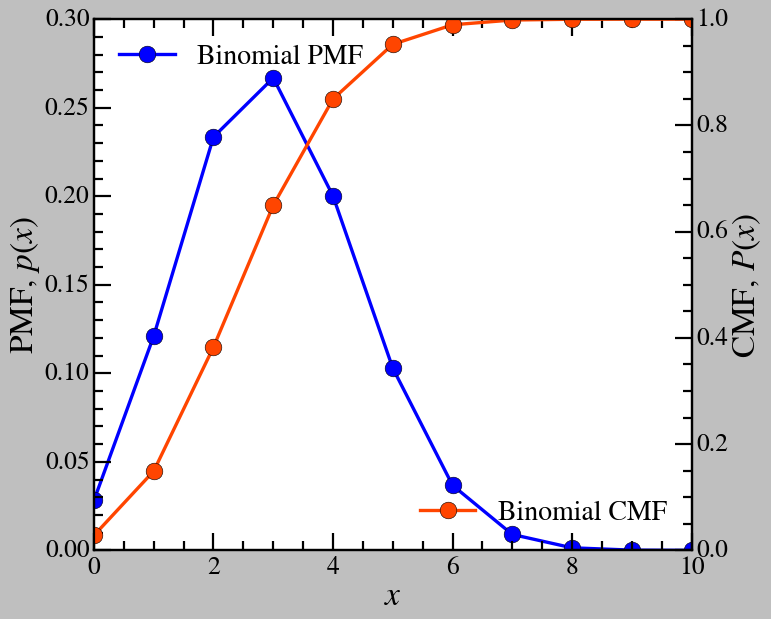

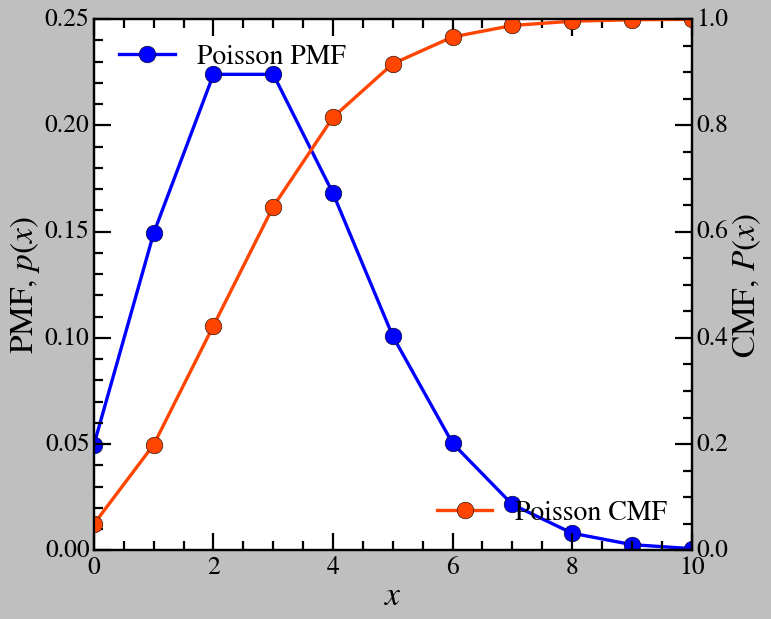

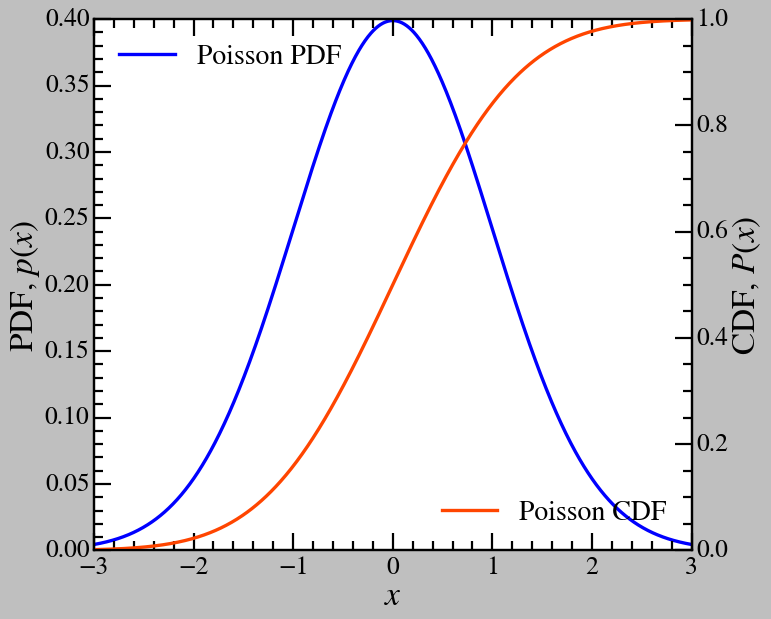

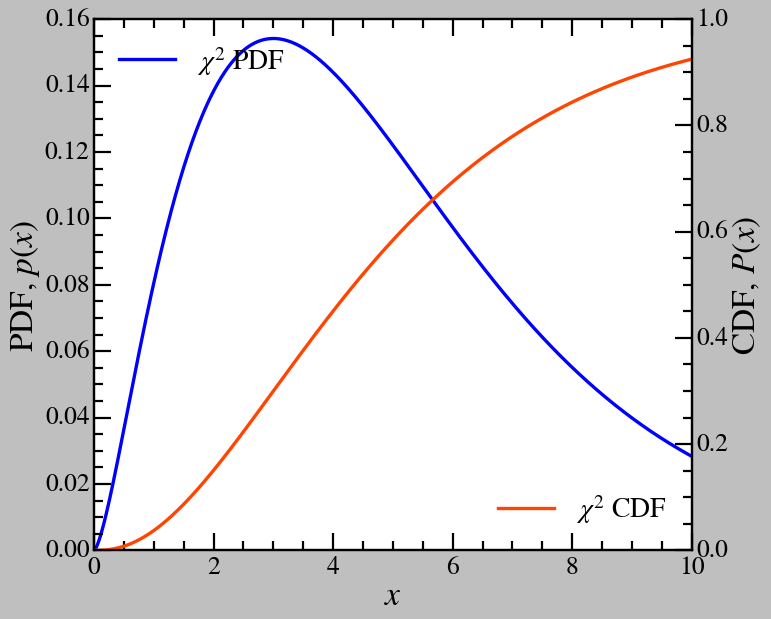

In [ ]:
from scipy.stats import binom, poisson, norm, chi2

# Binomial
binom_pmf = binom.pmf(np.linspace(0,10,11),10,0.3) #
binom_cmf = binom.cdf(np.linspace(0,10,11),10,0.3)
plot_pdf_and_cdf(np.linspace(0,10,11),binom_pmf,binom_cmf,'Binomial',True)

# Poisson
poisson_pmf = poisson.pmf(np.linspace(0,10,11),3) #
poisson_cmf = poisson.cdf(np.linspace(0,10,11),3)
plot_pdf_and_cdf(np.linspace(0,10,11),poisson_pmf,poisson_cmf,'Poisson',True)

# Gaussian
gaussian_pdf = norm.pdf(np.linspace(-3,3,1000),loc=0,scale=1) # loc: central value; scale: standard deviation
gaussian_cdf = norm.cdf(np.linspace(-3,3,1000),loc=0,scale=1)
plot_pdf_and_cdf(np.linspace(-3,3,1000),gaussian_pdf,gaussian_cdf,'Poisson',False)

# chi square
chisqr_pdf = chi2.pdf(np.linspace(0,10,1000),5) #
chisqr_cdf = chi2.cdf(np.linspace(0,10,1000),5)
plot_pdf_and_cdf(np.linspace(0,10,1000),chisqr_pdf,chisqr_cdf,r'$\chi^2$',False)

## I.3. Sampling

In [ ]:
np.random.seed(42)

N = 10000

# Uniform
X_uniform = np.random.random(size=N)
print('mean of uniform sample:',np.round(np.mean(X_uniform),3))
print('median of uniform sample:',np.round(np.median(X_uniform),3))
print('standard deviation of uniform sample:',np.round(np.std(X_uniform),3),'\n')

# Gaussian
X_gaussian = np.random.normal(size=N,loc=5,scale=3) # loc: central value; scale: standard deviation
print('mean of gaussian sample:',np.round(np.mean(X_gaussian),3))
print('median of gaussian sample:',np.round(np.median(X_gaussian),3))
print('standard gaussian of uniform sample:',np.round(np.std(X_gaussian),3),'\n')

# Inversion sampling is shown with Cubic Spline

mean of uniform sample: 0.494
median of uniform sample: 0.493
standard deviation of uniform sample: 0.288 

mean of gaussian sample: 5.037
median of gaussian sample: 5.05
standard gaussian of uniform sample: 2.999 



# II. Likelihood Statistics

## II.1. Some Useful Functions

### II.1.a. Gradient Descend

In [ ]:
from scipy.optimize import minimize

def func(x):
    return x**2

x_min = minimize(func,x0=[0.5]).x[0]
print('x_min:',np.round(x_min,3))

x_min: 0.0


### II.1.b. Roots Finding and Error in

In [ ]:
from scipy.optimize import fsolve

def func(x):
    return (x-3)**2 - 4

x_0_1 = fsolve(func,x0=[0])[0]
print('x_0_1:',np.round(x_0_1,3))

x_0_2 = fsolve(func,x0=[6])[0]
print('x_0_2:',np.round(x_0_2,3))

x_0_1: 1.0
x_0_2: 5.0


### II.1.c. Integral

In [ ]:
from scipy.integrate import quad

def integrand(x):
    return norm.pdf(x,loc=0,scale=1)

one_sigma = quad(integrand,a=-1,b=1)[0]
print('1-sigma probability:',np.round(one_sigma,3))

two_sigma = quad(integrand,a=-2,b=2)[0]
print('2-sigma probability:',np.round(two_sigma,3))

full_range = quad(integrand,a=-np.inf,b=np.inf)[0]
print('full range probability:',np.round(full_range,3))

1-sigma probability: 0.683
2-sigma probability: 0.954
full range probability: 1.0


## II.2. Maximum Likelihood Fitting

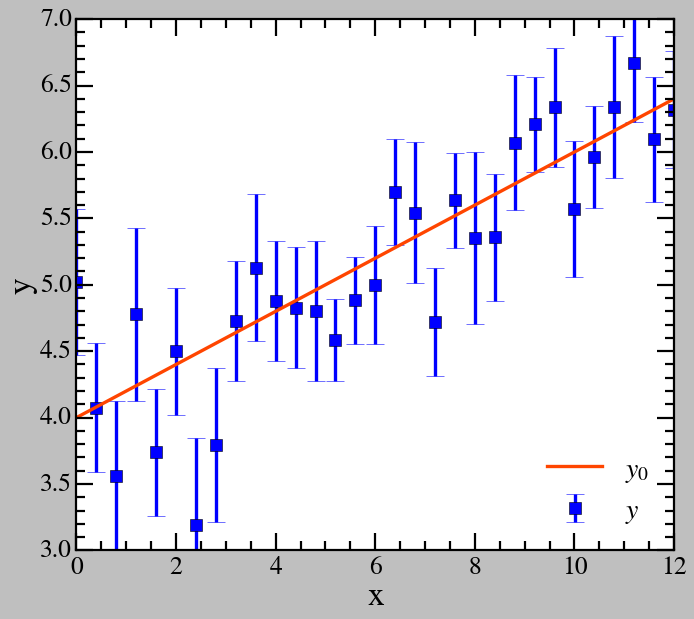

In [ ]:
np.random.seed(42)

# Generating data
x = np.linspace(0,12,31)
yhat = 0.2*x + 4
yerr = np.abs(np.random.normal(loc=0.5,scale=0.1,size=31))
y = yhat + np.random.normal(loc=0,scale=yerr)

# Visualizing data
fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

ax.errorbar(x,y,yerr,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2,label=r'$y$')
ax.plot(x,yhat,color='orangered',zorder=-1,label=r'$y_0$')

ax.set_ylim(3,7)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend(loc='lower right')

plt.show()

### II.2.a. Manual

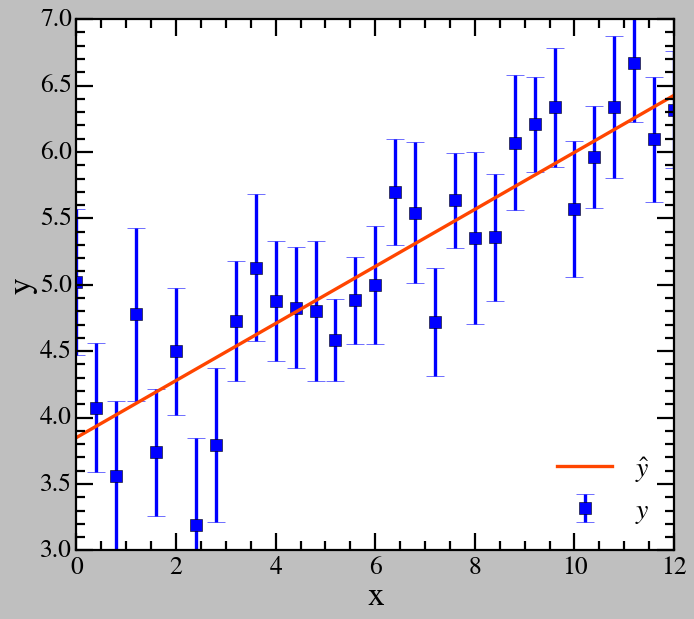

a: 0.215
b: 3.85
chisqr: 24.651
reduced chisqr: 0.85
p-value of chisqr: 0.696


In [ ]:
# Calculating the residual
def chisqr(func,params,x,y,yerr):
    return np.sum( (y-func(x,*params))**2 / yerr**2 )

# Setting up the fitting function
def linear(x,a,b):
    return a*x + b

# Least-square fitting
def regression(func,init_params,x,y,yerr,show_fit=True):
    result = minimize(lambda params: chisqr(func,params,x,y,yerr),init_params)

    params = result.x
    residual = chisqr(func,params,x,y,yerr)

    if show_fit:
        fig = plt.figure(figsize=(9, 8))
        ax = fig.add_axes([0.12,0.12,0.83,0.83])

        ax.errorbar(x,y,yerr,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2,label=r'$y$')
        ax.plot(x,func(x,*params),color='orangered',zorder=-1,label=r'$\hat{y}$')

        ax.set_ylim(3,7)

        ax.set_xlabel('x')
        ax.set_ylabel('y')

        ax.legend(loc='lower right')

        plt.show()

    return params, residual

# Visualizing fitting statistics
params,residual = regression(linear,[0,0],x,y,yerr)
print('a:',np.round(params[0],3))
print('b:',np.round(params[1],3))
print('chisqr:',np.round(residual,3))
print('reduced chisqr:',np.round(residual/(x.shape[0]-2),3))
print('p-value of chisqr:',np.round(1-chi2.cdf(residual,x.shape[0]-2),3))

### II.2.b. scipy.optimize.curve_fit

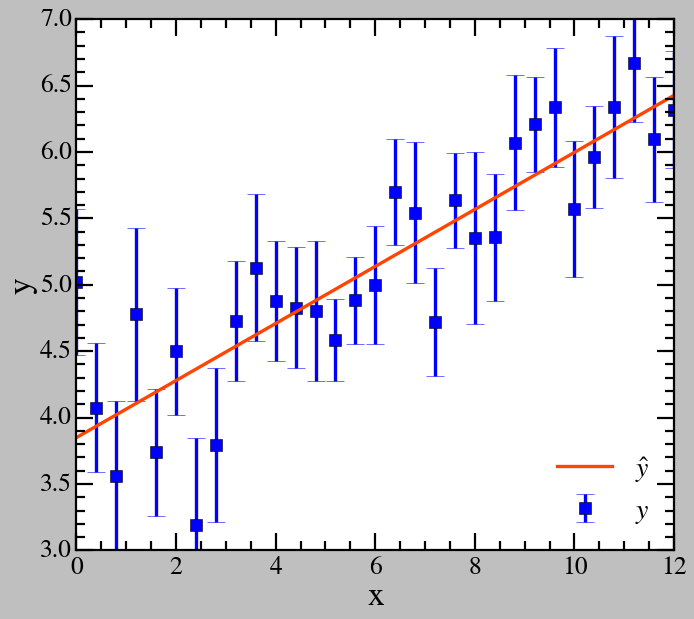

a: 0.215
b: 3.85
chisqr: 24.651
reduced chisqr: 0.85
p-value of chisqr: 0.696


In [ ]:
from scipy.optimize import curve_fit

# Regression
params, _, infodict, _, _ = curve_fit(linear,x,y,[0,0],yerr,full_output=True)
residual = np.sum(infodict['fvec']**2)

# Visualizing fit
fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

ax.errorbar(x,y,yerr,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2,label=r'$y$')
ax.plot(x,linear(x,*params),color='orangered',zorder=-1,label=r'$\hat{y}$')

ax.set_ylim(3,7)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend(loc='lower right')

plt.show()

print('a:',np.round(params[0],3))
print('b:',np.round(params[1],3))
print('chisqr:',np.round(residual,3))
print('reduced chisqr:',np.round(residual/(x.shape[0]-2),3))
print('p-value of chisqr:',np.round(1-chi2.cdf(residual,x.shape[0]-2),3))

## II.3. Uncertainnty of Fitted Parameters

<ipython-input-35-23508d897df1>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  params[param_index] = iparam


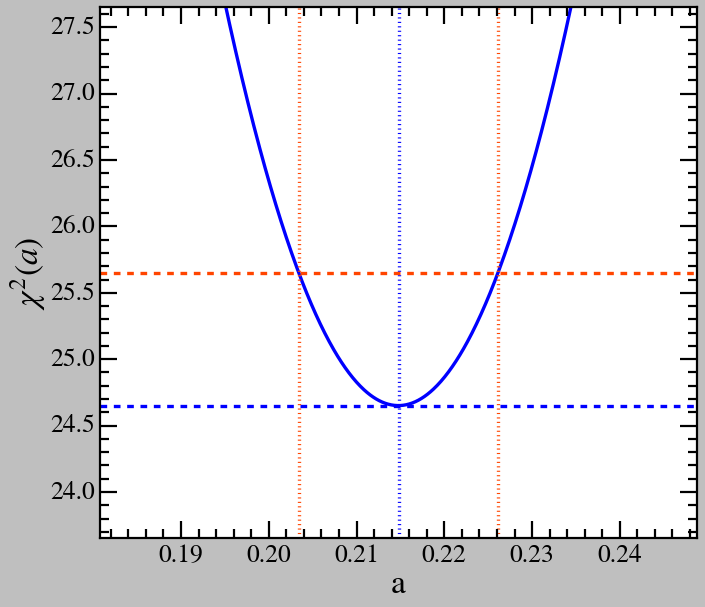

a_low: 0.203
a: 0.215
a_high: 0.226 



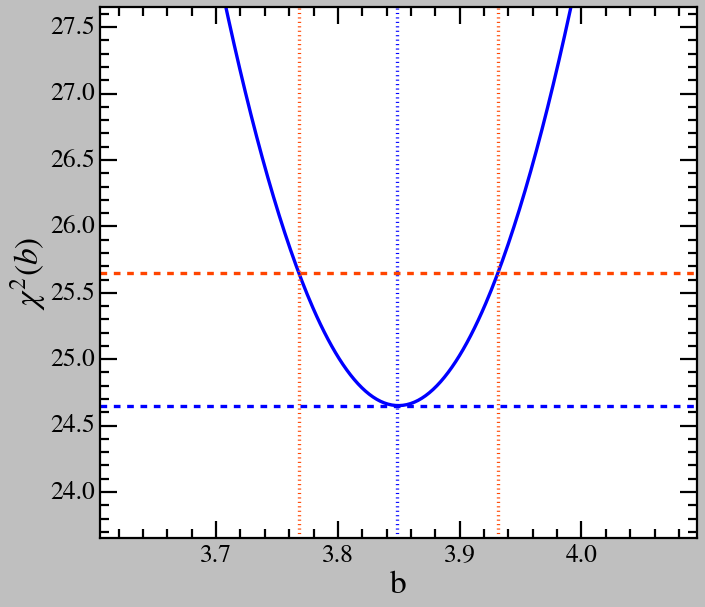

b_low: 3.768
b: 3.849
b_high: 3.931 



In [ ]:
def varying_chisqr(params,func,x,y,yerr,param_index,param_label,range=[0.8,1.2],show_fig=True):
    # Copying the best-fit parameters
    params = np.copy(params)

    # Creating a paramter proposal list
    param_array = params[param_index] * np.linspace(range[0],range[1],1000)

    # Calculating chi square with the proposed parameters
    chisqr_array = []
    for iparam in param_array:
        params[param_index] = iparam

        chisqr_array.append(chisqr(func,params,x,y,yerr))
    chisqr_array = np.array(chisqr_array)

    # Finding the parameters at which chi square deviates by 1
    def chisqr_deviation(iparam):
        params[param_index] = iparam
        return chisqr(func,params,x,y,yerr) - 1 - np.min(chisqr_array)
    param_low = fsolve(chisqr_deviation,param_array[0])[0]
    param_high = fsolve(chisqr_deviation,param_array[-1])[0]

    # Visualizing calculations
    if show_fig:
        fig = plt.figure(figsize=(9, 8))
        ax = fig.add_axes([0.12,0.12,0.83,0.83])

        ax.plot(param_array,chisqr_array)
        ax.axvline(param_array[np.argmin(chisqr_array)],ls=':')
        ax.axhline(np.min(chisqr_array),ls='--')

        ax.axhline(np.min(chisqr_array)+1,color='orangered',ls='--')
        ax.axvline(param_low,color='orangered',ls=':')
        ax.axvline(param_high,color='orangered',ls=':')

        ax.set_xlabel(f'{param_label}')
        ax.set_ylabel(rf'$\chi^2 ({param_label})$')

        ax.set_xlim(2*param_low-param_high,2*param_high-param_low)
        ax.set_ylim(np.min(chisqr_array)-1,np.min(chisqr_array)+3)

        plt.show()

    print(f'{param_label}_low:',np.round(param_low,3))
    print(f'{param_label}:',np.round(param_array[np.argmin(chisqr_array)],3))
    print(f'{param_label}_high:',np.round(param_high,3),'\n')

    return param_low, param_array[np.argmin(chisqr_array)], param_high

a_low, a, a_high = varying_chisqr(params,linear,x,y,yerr,0,'a')
b_low, b, b_high = varying_chisqr(params,linear,x,y,yerr,1,'b')

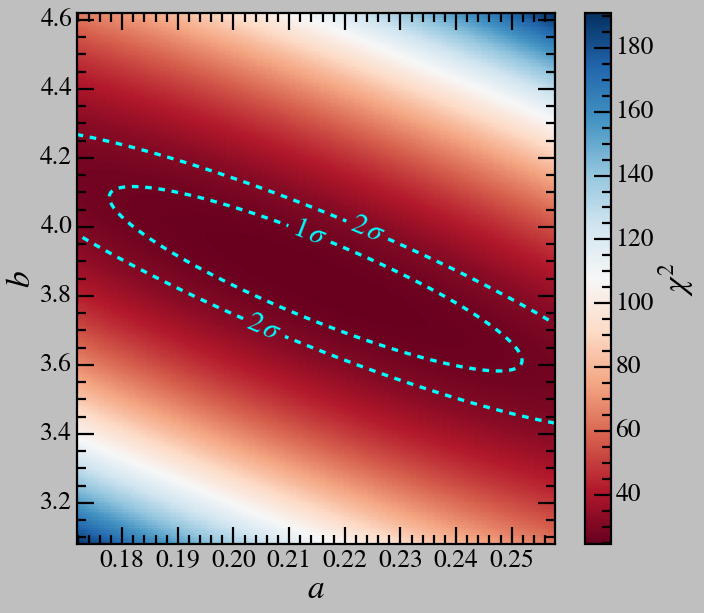

In [ ]:
def linear_grid(x,a,b):
    grid_shape = a.shape + tuple([1])
    return a.reshape(grid_shape) * np.tile(x,grid_shape) + b.reshape(grid_shape)

def chisqr_linear(a,b,x,y,yerr):
    return np.sum(
        (y-linear_grid(x,a,b))**2 / yerr**2, axis=2
    )

def varying_chisqr_grid(params,x,y,yerr,range=[0.8,1.2]):
    a_array = np.linspace(range[0],range[1],200)*params[0]
    b_array = np.linspace(range[0],range[1],200)*params[1]

    a_grid, b_grid = np.meshgrid(a_array,b_array)
    chisqr_grid = chisqr_linear(a_grid,b_grid,x,y,yerr).reshape(a_grid.shape)

    contours = [
        np.min(chisqr_grid)+chi2.ppf(1-2*norm.cdf(-1),2),
        np.min(chisqr_grid)+chi2.ppf(1-2*norm.cdf(-2),2)
    ]

    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_axes([0.12,0.12,0.83,0.83])

    c = ax.pcolor(a_grid, b_grid, chisqr_grid, cmap='RdBu')
    cb = fig.colorbar(c, ax=ax, location='right')
    cb.set_label(r"$\chi^2$")

    con = ax.contour(a_grid, b_grid, chisqr_grid, contours, colors='cyan', linewidths=3, linestyles='--', alpha=1)
    plt.clabel(con, inline=True, fontsize=26, use_clabeltext=True, fmt={np.min(chisqr_grid)+chi2.ppf(1-2*norm.cdf(-1),2):r'$1\,\sigma$',np.min(chisqr_grid)+chi2.ppf(1-2*norm.cdf(-2),2):r'$2\,\sigma$'})

    ax.set_xlim(a_array[0],a_array[-1])
    ax.set_ylim(b_array[0],b_array[-1])

    ax.set_xlabel(r'$a$')
    ax.set_ylabel(r'$b$')

    plt.show()

varying_chisqr_grid(params,x,y,yerr)

## II.3. Cubic Spline & Interpolation (with Inversion Sampling as Example)

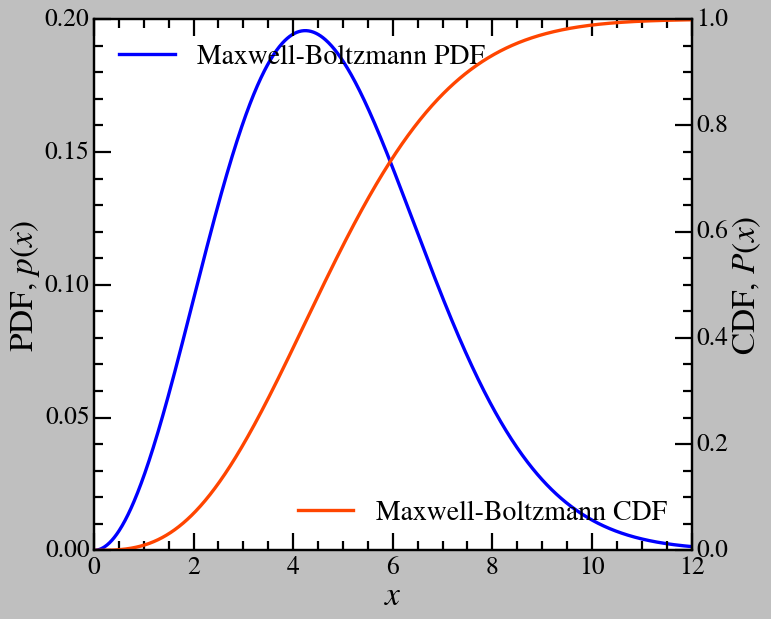

In [ ]:
# Maxwell-Boltzmann distribution as the example

def Maxwell_Boltzmann_pdf(v,v0=3):
    return (1/2/np.pi/v0**2)**(3/2) * np.exp(-v**2/2/v0**2) * 4*np.pi*v**2

# Calculating the pdf and cdf at specific values of velocity
v = np.linspace(0,12,1000)
MB_pdf = Maxwell_Boltzmann_pdf(v)
MB_cdf = np.cumsum(MB_pdf) * (v[1]-v[0])

plot_pdf_and_cdf(v,MB_pdf,MB_cdf,'Maxwell-Boltzmann')

In [ ]:
from scipy.interpolate import CubicSpline

# Using CubicSpline to interpolate the PPF (Probability Point Function, defined as the inverse of CDF)
MB_ppf_func = CubicSpline(MB_cdf,v)

# Sampling velocities with inversion sampling
np.random.seed(42)
v_sample = MB_ppf_func(np.random.random(size=10000))

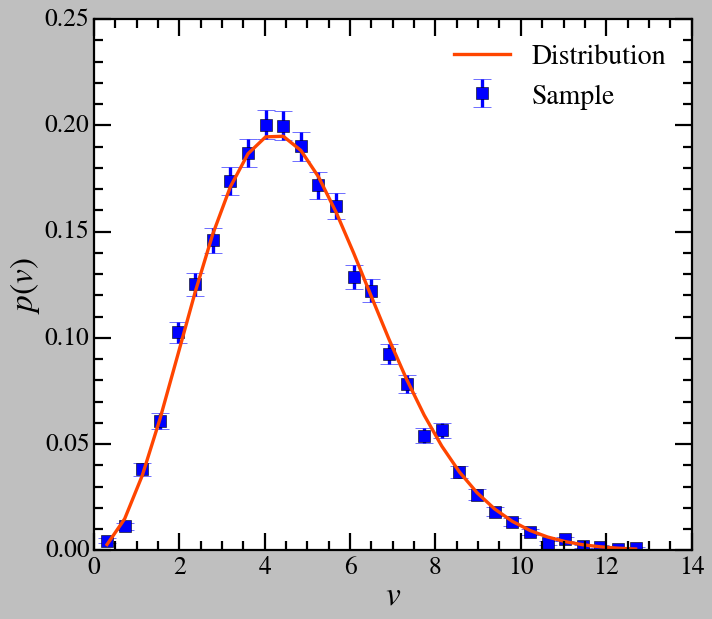

In [ ]:
# Visualizing distribution of a sample
def distribution_from_sample(x_sample,func=Maxwell_Boltzmann_pdf,bins=31,label=r'$v$'):
    # Calculating and normalizing the histogram
    hist,bins = np.histogram(x_sample,bins)
    hist_err = np.sqrt(hist)
    bin_center = (bins[1:] + bins[:-1]) / 2

    normalizing_factor = 1 / np.sum(hist) / (bins[1]-bins[0])
    hist, hist_err = hist*normalizing_factor, hist_err*normalizing_factor

    # Visualizing the histogram/distribution
    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_axes([0.12,0.12,0.83,0.83])

    ax.errorbar(bin_center,hist,hist_err,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2,label='Sample')
    ax.plot(bin_center,func(bin_center),color='orangered',label='Distribution')

    ax.set_xlabel(label)
    ax.set_ylabel(rf'$p (${label}$)$')

    ax.legend(loc='upper right')

    plt.show()

    return bin_center, hist, hist_err

v_bin_center, v_hist, v_hist_err = distribution_from_sample(v_sample)

# III. Hypothesis Testing

## III.1. p-value

In [ ]:
# Single-tail p-value
chisqr_example = 2
chisqr_order_example = 4
p_value_chisqr_example = 1 - chi2.cdf(chisqr_example,chisqr_order_example)
print(f'p-value of x={chisqr_example} for a {chisqr_order_example}th order chi square distribution:',np.round(p_value_chisqr_example,3),'\n')

# Double-tail p-value
gaussian_example = 5
p_value_gaussian_example = norm.cdf(-np.abs(gaussian_example)) + 1 - norm.cdf(np.abs(gaussian_example)) # also equal to 2*norm.cdf(-np.abs(gaussian_example))
z_score_gaussian_example = - norm.ppf(p_value_gaussian_example/2) # should be equal to the value of gaussian_example
print(f'p-value of x={gaussian_example} for a gaussian distribution:',1e-7*np.round(p_value_gaussian_example/1e-7,3))
print(f'z-score of p-value={1e-7*np.round(p_value_gaussian_example/1e-7,3)}:',np.round(z_score_gaussian_example,3))

p-value of x=2 for a 4th order chi square distribution: 0.736 

p-value of x=5 for a gaussian distribution: 5.733e-07
z-score of p-value=5.733e-07: 5.0


## III.2. Bootstrapping

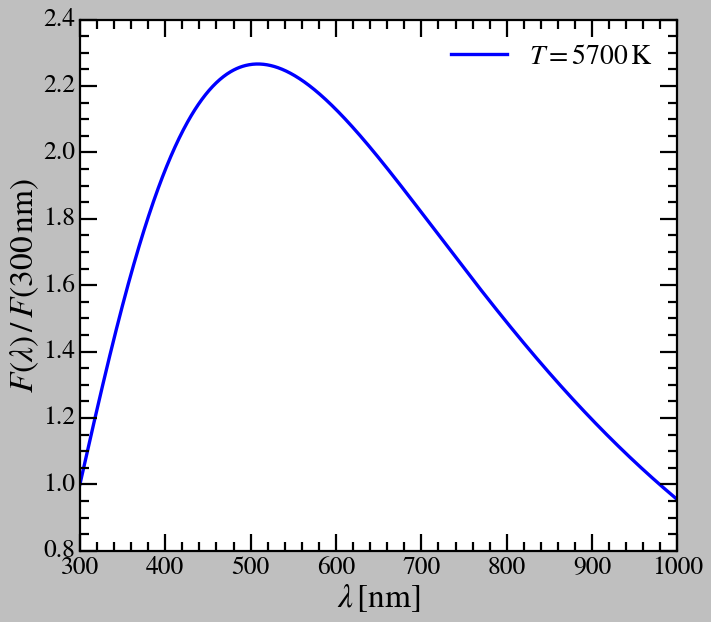

In [ ]:
# Black-body radiation as the example
h = 6.6261e-27
c = 2.99792458e10
kB = 1.3807e-16
T = 5700

# Visualizing an example of black-body radiation
def F_black_body(lambdas,T=T):
    lambdas = lambdas*1e-7 #from nanometer to cgs
    return 2*h*c**2/lambdas**5 / (np.exp(h*c/lambdas/kB/T)-1)

I_300 = F_black_body(300)

wave = np.linspace(300,1000,1000)
I_bg = F_black_body(wave)/I_300

fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

ax.plot(wave,I_bg,label=r'$T=5700\,\rm{K}$')

ax.set_xlabel(r'$\lambda\,[\rm{nm}]$')
ax.set_ylabel(r'$F(\lambda)\,/\,F(300\,\rm{nm})$')

ax.legend(loc='upper right')

plt.show()

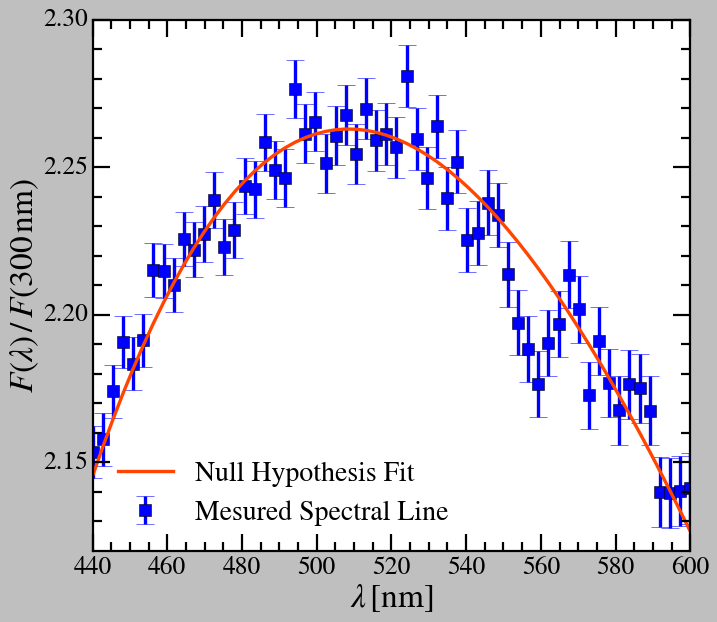

In [ ]:
# Adding uncertainty and an absorption feature, i.e. sampling/simulating an observation of the spectral line
np.random.seed(42)

wave = np.linspace(440,600,60)
I_bg_hat = F_black_body(wave)/I_300
I_bg_err = np.ones_like(I_bg_hat)*wave/5e4
I_bg = I_bg_hat + np.random.normal(scale=I_bg_err)

def absoption_line(lambdas,A,lambda_0,sigma_lambda):
    return - A * norm.pdf(lambdas,loc=lambda_0,scale=sigma_lambda)

I = I_bg + absoption_line(wave,0.4,556,5)

fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

ax.errorbar(wave,I,I_bg_err,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2,label='Mesured Spectral Line')

# Fitting the null hypothesis (only black-body radiation)
params, _ = curve_fit(F_black_body,wave,I*I_300,[5700],I_bg_err*I_300)
null_residual = np.sum(
    (I-F_black_body(wave,*params)/I_300)**2/I_bg_err**2
)
ax.plot(wave,F_black_body(wave,*params)/I_300,color='orangered',zorder=-1,label='Null Hypothesis Fit')

ax.set_xlabel(r'$\lambda\,[\rm{nm}]$')
ax.set_ylabel(r'$F(\lambda)\,/\,F(300\,\rm{nm})$')

ax.legend(loc='lower left')

plt.show()

In [ ]:
np.random.seed(42)

# Bootstrapping
def F_bootstrapping(T=params[0],N_boot=100000):
    boot_residuals = []

    for i in range(N_boot):
        I_boot = F_black_body(wave,T)/I_300 + np.random.normal(scale=I_bg_err)

        boot_residuals.append(
            np.sum((I_boot-F_black_body(wave,*params)/I_300)**2/I_bg_err**2)
        )

    return boot_residuals

boot_residuals = F_bootstrapping()

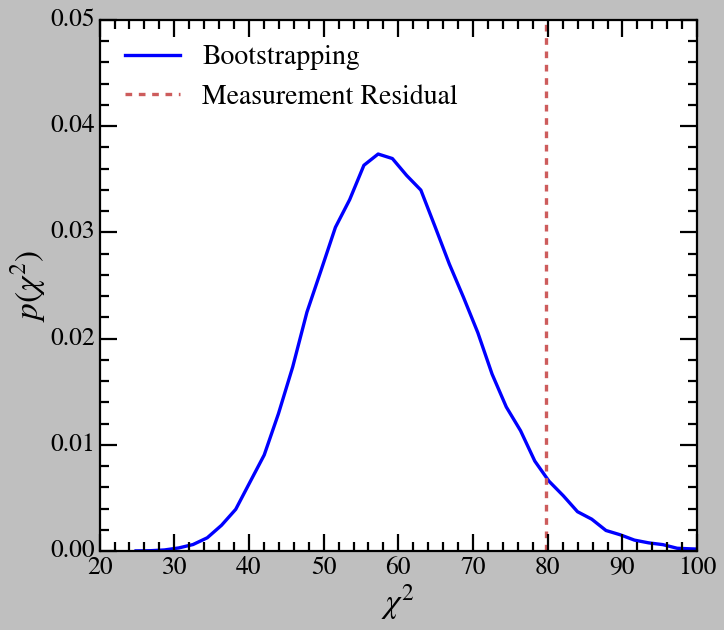

p-value from comparing the residuals from bootstrapping the null hypothesis: 0.048


In [ ]:
# Visualizing the bootstrapping and calculating p-value
fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

hist,bins = np.histogram(boot_residuals,bins=51)
bin_center = (bins[1:] + bins[:-1])/2
hist = hist/np.sum(hist)/(bins[1]-bins[0])

ax.plot(bin_center,hist,label='Bootstrapping')
ax.axvline(null_residual,ls='--',color='indianred',label='Measurement Residual')

ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel(r'$p(\chi^2)$')

ax.set_ylim(0,0.05)
ax.set_xlim(20,100)

ax.legend(loc='upper left')

plt.show()

p_value_boot = 1 - np.sum(hist[bin_center<=null_residual]) * (bins[1]-bins[0])
print('p-value from comparing the residuals from bootstrapping the null hypothesis:',np.round(p_value_boot,3))

## III.3. Likelihood-ratio Testing

residual (chi square) of the null hypothesis: 79.713
residual (chi square) of the alternative hypothesis: 46.48


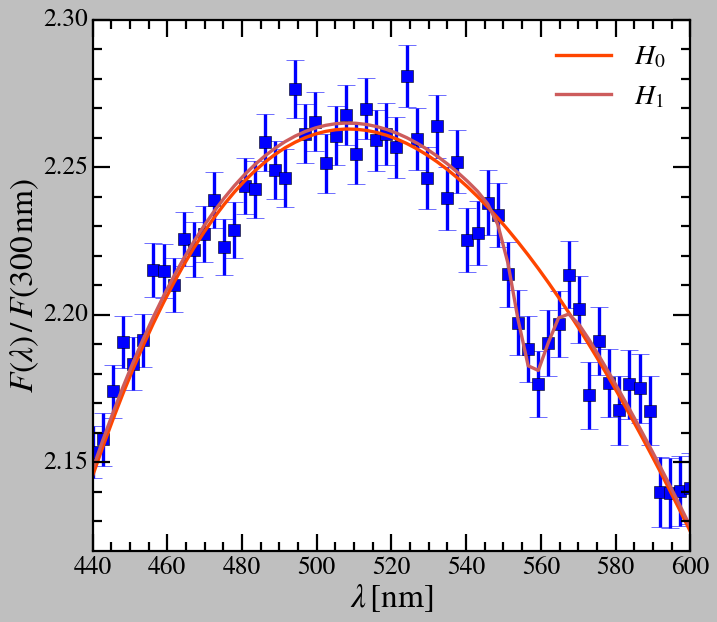

In [ ]:
# Fitting the null hypothesis
H0_params, _ = curve_fit(F_black_body,wave,I*I_300,[5700],I_bg_err*I_300)
H0_I_hat = F_black_body(wave,*H0_params)/I_300
H0_chisqr = np.sum(
    (I-H0_I_hat)**2/I_bg_err**2
)
print('residual (chi square) of the null hypothesis:',np.round(H0_chisqr,3))

# Fitting the alternative hypothesis
H1_params, _ = curve_fit(lambda x,T,A,lambda_0,sigma_lambda: F_black_body(x,T) + I_300*absoption_line(x,A,lambda_0,sigma_lambda),wave,I*I_300,[5700,0.75,556,5],I_bg_err*I_300)
H1_I_hat = (F_black_body(wave,H1_params[0])/I_300 + absoption_line(wave,*H1_params[1:]))
H1_chisqr = np.sum(
    (I-H1_I_hat)**2/I_bg_err**2
)
print('residual (chi square) of the alternative hypothesis:',np.round(H1_chisqr,3))

# Visualizing the fits
fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0.12,0.12,0.83,0.83])

ax.errorbar(wave,I,I_bg_err,fmt=' ',marker='s',markersize=10,capsize=8,zorder=-2)

ax.plot(wave,H0_I_hat,color='orangered',zorder=-1,label=r'$H_0$')
ax.plot(wave,H1_I_hat,color='indianred',zorder=-1,label=r'$H_1$')

ax.set_xlabel(r'$\lambda\,[\rm{nm}]$')
ax.set_ylabel(r'$F(\lambda)\,/\,F(300\,\rm{nm})$')

ax.legend(loc='upper right')

plt.show()

In [ ]:
# Likelihood-ratio Statistics
delta_chisqr = H0_chisqr - H1_chisqr
p_value = 1 - chi2.cdf(delta_chisqr,3)
z_score = - norm.ppf(p_value/2)
print('p-value of H1 compared to H0:',1e-7*np.round(p_value/1e-7,2))
print('z-score of H1 compared to H0:',np.round(z_score,3))

p-value of H1 compared to H0: 2.88e-07
z-score of H1 compared to H0: 5.131
